In [347]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

In [348]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [349]:
dataset = pd.read_csv("sample_data/USA_CO2.csv", parse_dates= True)

In [350]:
dataset.head(5)

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,USA,United States,1800,0.253,NaN,NaN,NaN,NaN,0.042,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000,NaN,NaN,NaN,NaN
1,USA,United States,1801,0.267,NaN,5.80,0.015,NaN,0.044,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782,NaN,NaN,NaN,NaN
2,USA,United States,1802,0.289,NaN,8.22,0.022,NaN,0.046,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723,NaN,NaN,NaN,NaN
3,USA,United States,1803,0.297,NaN,2.53,0.007,NaN,0.047,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862,NaN,NaN,NaN,NaN
4,USA,United States,1804,0.333,NaN,12.35,0.037,NaN,0.052,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241,NaN,NaN,NaN,NaN


In [351]:
#dataset.info()
#dropping all columns except year and co2
dataset.drop(dataset.columns.difference(['year','co2']), 1, inplace=True)
dataset=dataset.rename(columns={ 'co2':'target'})
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,year,target
0,1800,0.253
1,1801,0.267
2,1802,0.289
3,1803,0.297
4,1804,0.333


In [352]:
year_max = dataset['year'].max()
year_min = dataset['year'].min()

length = year_max - year_min +1

#creating a list of years to store all year values
year_val = dataset['year']

dataset['Date'] = [str(year)+'/1/1' for year in year_val]


dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.tail(5)

,year,target,Date
216,2016,5248.024,2016-01-01
217,2017,5207.751,2017-01-01
218,2018,5375.491,2018-01-01
219,2019,5255.816,2019-01-01
220,2020,4712.771,2020-01-01


In [353]:
dataset.set_index('Date',inplace=True)
dataset.tail()

,year,target
Date,,
2016-01-01,2016,5248.024
2017-01-01,2017,5207.751
2018-01-01,2018,5375.491
2019-01-01,2019,5255.816
2020-01-01,2020,4712.771


In [354]:

len(dataset)

221

In [355]:
train = dataset.iloc[:176,:]
test = dataset.iloc[176:,:]



In [356]:
training_set = dataset[:176].iloc[:,1:2].values
test_set = test.iloc[:,1:2].values

print(training_set[0:5])
print(test_set[-1])

[[0.253]
 [0.267]
 [0.289]
 [0.297]
 [0.333]]
[4712.771]


In [357]:
print(training_set.shape)
print(test_set.shape)

(176, 1)
(45, 1)


In [358]:
test_set

array([[4747.563],
       [4889.398],
       [4941.142],
       [5008.359],
       [4808.296],
       [4686.172],
       [4447.08 ],
       [4429.187],
       [4661.921],
       [4652.383],
       [4663.165],
       [4825.445],
       [5050.268],
       [5131.927],
       [5113.455],
       [5057.931],
       [5167.481],
       [5267.343],
       [5358.824],
       [5421.502],
       [5610.582],
       [5686.465],
       [5731.05 ],
       [5804.669],
       [6010.508],
       [5904.882],
       [5946.771],
       [6011.837],
       [6114.007],
       [6134.521],
       [6051.668],
       [6131.004],
       [5914.078],
       [5478.21 ],
       [5675.786],
       [5540.173],
       [5338.698],
       [5474.257],
       [5522.807],
       [5371.771],
       [5248.024],
       [5207.751],
       [5375.491],
       [5255.816],
       [4712.771]])

In [359]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [360]:
X_train = []
y_train = []
for i in range(3,176):
    X_train.append(training_set_scaled[i-3:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [361]:
print(X_train[0:5])
print(y_train[0:5])

[[0.00000000e+00 2.92607277e-06 7.52418713e-06]
 [2.92607277e-06 7.52418713e-06 9.19622871e-06]
 [7.52418713e-06 9.19622871e-06 1.67204158e-05]
 [9.19622871e-06 1.67204158e-05 1.83924574e-05]
 [1.67204158e-05 1.83924574e-05 1.67204158e-05]]
[9.19622871e-06 1.67204158e-05 1.83924574e-05 1.67204158e-05
 2.59166445e-05]


In [362]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape


(173, 3, 1)

In [363]:
y_train.shape

(173,)

In [364]:
dataset_total = pd.concat((dataset["target"][:176],dataset["target"][176:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 3:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(48, 1)

In [365]:
X_test = []
for i in range(3,48):
    X_test.append(inputs[i-3:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

(45, 3, 1)


In [366]:
regressorGRU = Sequential()
regressorGRU.add(GRU(25, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorGRU.add(GRU(50, return_sequences=True))
regressorGRU.add(GRU(50))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(Dense(units=1))
regressorGRU.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['accuracy'])
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=16,validation_split=0.20)

Epoch 1/20
9/9 [==============================] - 7s 156ms/step - loss: 0.0191 - accuracy: 0.0000e+00 - val_loss: 0.2101 - val_accuracy: 0.0000e+00
Epoch 2/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0137 - val_accuracy: 0.0286
Epoch 3/20
9/9 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0286
Epoch 4/20
9/9 [==============================] - 0s 12ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0286
Epoch 5/20
9/9 [==============================] - 0s 12ms/step - loss: 7.2749e-04 - accuracy: 0.0000e+00 - val_loss: 0.0054 - val_accuracy: 0.0286
Epoch 6/20
9/9 [==============================] - 0s 11ms/step - loss: 8.9928e-04 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0286
Epoch 7/20
9/9 [==============================] - 0s 12ms/step - loss: 8.5205e-04 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val

In [367]:
GRU_predicted_co2 = regressorGRU.predict(X_test)
print(GRU_predicted_co2.shape)

GRU_predicted_co2 = sc.inverse_transform(GRU_predicted_co2)
print(GRU_predicted_co2.shape)

(45, 1)
(45, 1)


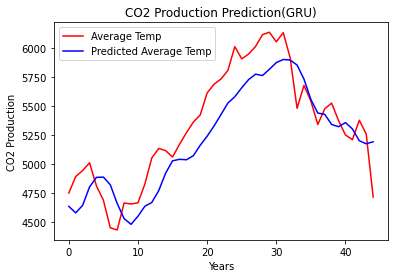

In [368]:
plt.plot(test_set, color='red',label='Average Temp')
plt.plot(GRU_predicted_co2, color='blue',label='Predicted Average Temp')
plt.title('CO2 Production Prediction(GRU)')
plt.xlabel('Years')
plt.ylabel('CO2 Production')
plt.legend()
plt.show()

In [369]:
MAP = np.mean(np.abs((test_set - GRU_predicted_co2) / test_set)) * 100

In [370]:
print("Mean Absolute Percentage Error is",MAP)

Mean Absolute Percentage Error is 4.043684349440375


In [371]:
rmse = math.sqrt(mean_squared_error(test_set, GRU_predicted_co2))
print("The root mean squared error is {}.".format(rmse))
p = test_set.mean()
print("The Predicted Values differs about",(rmse/p)*100, "% from the mean values")

The root mean squared error is 245.29463107318665.
The Predicted Values differs about 4.6072902690056505 % from the mean values


In [372]:
#Predicting future values

temp = test_set[12:]
scaled_data = sc.transform(temp)
new_data = []

for i in range(len(scaled_data)-3):
  v = scaled_data[i:i+3]
  new_data.append(v)

new_data=np.array(new_data)
print('new_data.shape: ', new_data.shape)

new_data.shape:  (30, 3, 1)


In [373]:

GRU_predicted_futco2 = regressorGRU.predict(new_data)
GRU_predicted_futco2 = sc.inverse_transform(GRU_predicted_futco2)

Text(0, 0.5, 'CO2 Production')

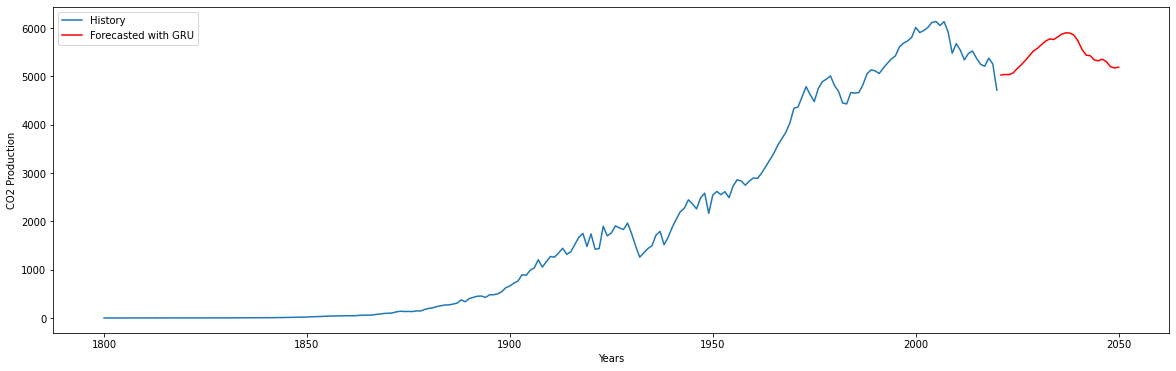

In [374]:
plt.figure(figsize=(20, 6))
    
startsize= len(dataset)
futuresize = list(range(2021, 2021 + len(GRU_predicted_futco2)))

plt.plot(1800 + np.arange(startsize), np.array(dataset['target']), label='History')
plt.plot(futuresize, np.array(GRU_predicted_futco2),label='Forecasted with GRU', color='red')


plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('CO2 Production')

In [375]:
predicted_data = pd.DataFrame(GRU_predicted_futco2)

In [376]:
predicted_data.columns=['co2']

#Printing a year list
year_list=[]
for i in range(1,31):
  year = 2020 + i
  year_list.append(year)

print(year_list)

[2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]


In [377]:
predicted_data['Year'] = year_list

In [378]:
predicted_data.head()

,co2,Year
0,5025.201172,2021
1,5038.248535,2022
2,5034.464844,2023
3,5069.341309,2024
4,5159.456543,2025


In [379]:
year_val1 = predicted_data['Year']

predicted_data['Date'] = [str(year)+'/1/1' for year in year_val1]


predicted_data['Date'] = pd.to_datetime(predicted_data['Date'])

In [380]:
predicted_data.set_index('Date',inplace=True)
predicted_data.head()

,co2,Year
Date,,
2021-01-01,5025.201172,2021
2022-01-01,5038.248535,2022
2023-01-01,5034.464844,2023
2024-01-01,5069.341309,2024
2025-01-01,5159.456543,2025


In [381]:
predicted_data = predicted_data.iloc[:, [1,0]]


In [382]:
predicted_data.head()

,Year,co2
Date,,
2021-01-01,2021,5025.201172
2022-01-01,2022,5038.248535
2023-01-01,2023,5034.464844
2024-01-01,2024,5069.341309
2025-01-01,2025,5159.456543


In [383]:
dataset.tail()

,year,target
Date,,
2016-01-01,2016,5248.024
2017-01-01,2017,5207.751
2018-01-01,2018,5375.491
2019-01-01,2019,5255.816
2020-01-01,2020,4712.771


In [384]:
dataset1=dataset.rename(columns={ 'year':'Year','target':'co2'})
dataset1.tail()

,Year,co2
Date,,
2016-01-01,2016,5248.024
2017-01-01,2017,5207.751
2018-01-01,2018,5375.491
2019-01-01,2019,5255.816
2020-01-01,2020,4712.771


In [385]:
forecast_data = dataset1.append(predicted_data)


In [386]:
forecast_data=forecast_data.rename(columns={'ds':'Date'})

In [387]:
forecast_data.tail()

,Year,co2
Date,,
2046-01-01,2046,5355.192383
2047-01-01,2047,5300.283203
2048-01-01,2048,5198.195801
2049-01-01,2049,5172.487305
2050-01-01,2050,5189.461914


In [388]:
forecast_data.to_csv("Forecast USA CO2 Data.csv")

In [388]:
#Accuracy = 100 - MAP
#Accuracy = 95.956%